In [110]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
np.random.seed(1)

In [2]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = df.drop('target', axis=1)

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y = df[['target']]

In [8]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [9]:
clf = RandomForestClassifier(n_estimators=100)

In [10]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape

(242, 13)

In [13]:
X_test.shape

(61, 13)

In [14]:
y_train.shape

(242, 1)

In [15]:
y_test.shape

(61, 1)

In [16]:
y_train = np.ravel(y_train)

In [17]:
y_train.shape

(242,)

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
y_pred.shape

(61,)

In [21]:
clf.score(X_test, y_test)

0.7868852459016393

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [23]:
confusion_matrix(y_test, y_pred)

array([[22,  8],
       [ 5, 26]], dtype=int64)

In [24]:
accuracy_score(y_pred, y_test)

0.7868852459016393

In [25]:
for i in range(10, 100, 10):
    print(f'Using {i} estimators..')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f'Score: {clf.score(X_test, y_test)*100:.2f}%')

Using 10 estimators..
Score: 75.41%
Using 20 estimators..
Score: 73.77%
Using 30 estimators..
Score: 78.69%
Using 40 estimators..
Score: 77.05%
Using 50 estimators..
Score: 72.13%
Using 60 estimators..
Score: 73.77%
Using 70 estimators..
Score: 80.33%
Using 80 estimators..
Score: 73.77%
Using 90 estimators..
Score: 73.77%


In [26]:
clf = RandomForestClassifier(n_estimators=70)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

75.40983606557377

In [27]:
pickle.dump(clf, open('rf_model_70_est.pk1', 'wb'))

In [28]:
loaded_model = pickle.load(open('rf_model_70_est.pk1', 'rb'))

In [29]:
loaded_model.score(X_test, y_test)

0.7540983606557377

In [30]:
clf.predict_proba(X_test[:5])

array([[0.95714286, 0.04285714],
       [0.12857143, 0.87142857],
       [0.88571429, 0.11428571],
       [1.        , 0.        ],
       [0.88571429, 0.11428571]])

In [31]:
cross_val_score(clf, X, np.ravel(y), cv=10)

array([0.83870968, 0.80645161, 0.87096774, 0.86666667, 0.9       ,
       0.73333333, 0.7       , 0.83333333, 0.73333333, 0.83333333])

In [32]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
cross_val_score(clf, X, np.ravel(y), cv=5, scoring='accuracy')

array([0.81967213, 0.86885246, 0.80327869, 0.8       , 0.76666667])

# Classification evaluation

In [34]:
print(f'Cross validation mean accuracy: {np.mean(cross_val_score(clf, X, np.ravel(y), cv=5, scoring="accuracy"))*100:.2f}%')

Cross validation mean accuracy: 81.84%


In [35]:
#AUC
#ROC
y_pred_probability = clf.predict_proba(X_test)

In [36]:
y_pred_positive = y_pred_probability[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, y_pred_positive)

In [37]:
FPR, TPR, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03333333, 0.1       , 0.13333333, 0.13333333,
        0.16666667, 0.16666667, 0.2       , 0.26666667, 0.3       ,
        0.36666667, 0.36666667, 0.4       , 0.4       , 0.43333333,
        0.43333333, 0.46666667, 0.53333333, 0.63333333, 0.7       ,
        0.76666667, 0.86666667, 1.        ]),
 array([0.        , 0.06451613, 0.19354839, 0.29032258, 0.32258065,
        0.41935484, 0.4516129 , 0.4516129 , 0.51612903, 0.5483871 ,
        0.58064516, 0.64516129, 0.67741935, 0.67741935, 0.80645161,
        0.80645161, 0.87096774, 0.87096774, 0.93548387, 0.93548387,
        0.96774194, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([2.        , 1.        , 0.94285714, 0.92857143, 0.9       ,
        0.87142857, 0.85714286, 0.82857143, 0.8       , 0.75714286,
        0.71428571, 0.68571429, 0.67142857, 0.57142857, 0.52857143,
        0.48571429, 0.47

In [38]:
#Plotting ROC curve
def plot_ROC(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

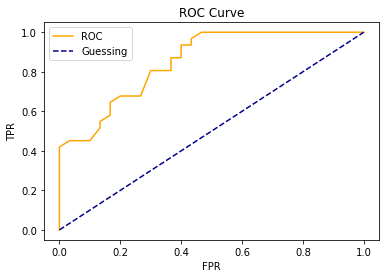

In [39]:
plot_ROC(FPR, TPR)

In [40]:
roc_auc_score(y_test, y_pred_positive)

0.8516129032258064

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [42]:
pd.crosstab(np.ravel(y_test), y_pred, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,22,8
1,5,26


<AxesSubplot:>

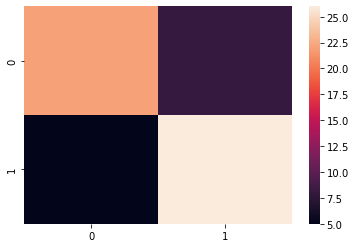

In [43]:
sns.heatmap(conf_matrix)

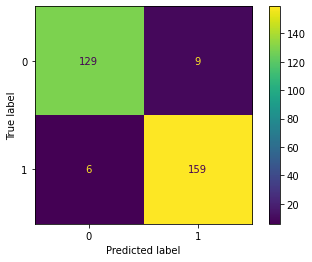

In [44]:
ConfusionMatrixDisplay.from_estimator(clf, X, y)

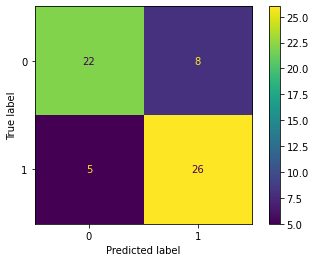

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [46]:
# classification report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [48]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.814815,0.764706,0.786885,0.789760,0.789350
recall,0.733333,0.838710,0.786885,0.786022,0.786885
f1-score,0.771930,0.800000,0.786885,0.785965,0.786195
support,30.000000,31.000000,0.786885,61.000000,61.000000


In [49]:
np.mean(cross_val_score(clf, X, np.ravel(y), cv=5, scoring="precision")*100)

83.03693250722112

In [50]:
np.mean(cross_val_score(clf, X, np.ravel(y), cv=5, scoring="recall")*100)

86.06060606060605

In [51]:
accuracy_score(y_test, y_pred)

0.7868852459016393

In [52]:
precision_score(y_pred, y_test)

0.8387096774193549

In [53]:
recall_score(y_test, y_pred)

0.8387096774193549

In [54]:
f1_score(y_test, y_pred)

0.7999999999999999

# Improve model

In [55]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
def evaluate_preds(y_true, y_preds):
    acc_score = accuracy_score(y_true, y_preds)
    per_score = precision_score(y_preds, y_true)
    rec_score = recall_score(y_true, y_preds)
    f1score = f1_score(y_true, y_preds)
    metrics_dict = {'accuracy': round(acc_score, 2),
                    'precision': round(per_score, 2),
                    'recall': round(rec_score, 2),
                    'f1 score': round(f1score, 2),
                    }
    return metrics_dict

In [57]:
evaluate_preds(y_test, y_pred)

{'accuracy': 0.79, 'precision': 0.84, 'recall': 0.84, 'f1 score': 0.8}

In [58]:
# shuffle the data
df = df.sample(frac=1)

In [59]:
# split into train, validate, test
X = df.drop('target', axis=1)
y = df['target']
train_split = round(0.7*len(df))
valid_split = round(train_split+0.15*len(df))

In [60]:
X_train, y_train = X[:train_split], y[:train_split]

In [61]:
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]

In [62]:
X_test, y_test = X[valid_split:], y[valid_split:]

In [63]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [64]:
len(y_train), len(y_valid), len(y_test)

(212, 45, 46)

In [65]:
clf = RandomForestClassifier()

In [66]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = clf.predict(X_valid)

In [69]:
baseline_metrics = evaluate_preds(y_valid, y_pred)

In [70]:
baseline_metrics

{'accuracy': 0.8, 'precision': 0.92, 'recall': 0.92, 'f1 score': 0.84}

# Tuning parameters using RandomizedSearchCV

In [72]:
grid = {'n_estimators': [10,100,1000,5000],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

In [74]:
clf = RandomForestClassifier(n_jobs=-1)

In [78]:
rs_clf = RandomizedSearchCV(clf, param_distributions=grid, n_iter=50, cv=5, verbose=2)

In [79]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estima

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=20, m

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_fea

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 1000, 5000]},
                   verbose=2)

In [80]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [81]:
y_pred_rs = rs_clf.predict(X_test)

In [91]:
rs_metrics = evaluate_preds(y_test, y_pred_rs)

In [92]:
rs_metrics

{'accuracy': 0.8, 'precision': 0.9, 'recall': 0.9, 'f1 score': 0.81}

# Tuning parameters using GridSearchCV

In [83]:
grid

{'n_estimators': [10, 100, 1000, 5000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [86]:
gs_clf = GridSearchCV(clf, param_grid=grid, cv=5, verbose=2)

In [87]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_dept

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=auto, mi

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, mi

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=5000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=5000; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=5000; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, max_features

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=5000; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5000; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=5000; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=5000; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 100, 1000, 5000]},
             verbose=2)

In [88]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [89]:
y_pred_gs = gs_clf.predict(X_test)

In [93]:
gs_metrics = evaluate_preds(y_test, y_pred_gs)

In [94]:
gs_metrics

{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.86, 'f1 score': 0.8}

In [95]:
compare_metrics = pd.DataFrameFrame({'baseline': baseline_metrics,
                                'random_search': rs_metrics,
                                'grid_search': gs_metrics})

<AxesSubplot:>

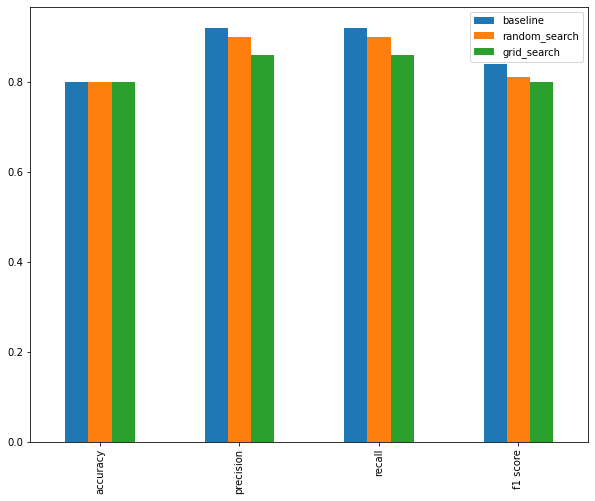

In [96]:
compare_metrics.plot.bar(figsize=(10, 8))

# Saving and loading models

In [97]:
pickle.dump(gs_clf, open('gs_rf_1.pkl', 'wb'))

In [98]:
loaded_pickle_model = pickle.load(open('gs_rf_1.pkl', 'rb'))

In [100]:
pickles_pred = loaded_pickle_model.predict(X_test)

In [101]:
evaluate_preds(y_test, pickles_pred)

{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.86, 'f1 score': 0.8}

In [111]:
# using joblib

In [115]:
joblib.dump(gs_clf, filename='gs_rf_1.joblib')

['gs_rf_1.joblib']

In [116]:
joblib_model = joblib.load(filename='gs_rf_1.joblib')

In [118]:
joblib_pred = joblib_model.predict(X_test)

In [119]:
evaluate_preds(y_test, joblib_pred)

{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.86, 'f1 score': 0.8}